In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_sc1 = pd.read_csv("Hiring_Exercise_Files/Student Count File 19-20.csv")
df_sc2 = pd.read_csv("Hiring_Exercise_Files/Student Count File 20-21.csv")
df_sc3 = pd.read_csv("Hiring_Exercise_Files/Student Count File 21-22.csv")
df_sc4 = pd.read_csv("Hiring_Exercise_Files/Student Count File 22-23.csv")

df_school_count = pd.DataFrame()
frame1 = [df_sc1, df_sc2, df_sc3, df_sc4]

for df in frame1:
    df_school_count = df_school_count.append(df)

df_school_count = df_school_count[df_school_count['BuildingCode'].notna()]

In [4]:
df_ee1 = pd.read_csv("Hiring_Exercise_Files/EEM File 19-20.csv")
df_ee2 = pd.read_csv("Hiring_Exercise_Files/EEM File 20-21.csv")
df_ee3 = pd.read_csv("Hiring_Exercise_Files/EEM File 21-22.csv")
df_ee4 = pd.read_csv("Hiring_Exercise_Files/EEM File 22-23.csv")


df_eem = pd.DataFrame()
frame2 = [df_ee1, df_ee2, df_ee3, df_ee4]

for df in frame2:
    df_eem = df_eem.append(df)
    
df_eem = df_eem[df_eem['BuildingCode'].notna()]

In [5]:
df_city = df_eem[['DistrictCode', 'CITY']].drop_duplicates(subset='DistrictCode').reset_index(drop=True)

df_count = df_school_count.merge(df_city, how='left', on='DistrictCode')

df_count['SchoolYear'] = df_count['SchoolYear'].str.replace(' School Year','')

df_compare = df_count[['SchoolYear', 'CountyName', 'CITY', 'TOTAL_ENROLLMENT', 'EntityType']]

In [6]:
df_detroit = df_compare.loc[df_compare["CITY"]=="Detroit"]

df_psa = df_detroit.loc[df_detroit['EntityType']=='PSA School']
df_lea = df_detroit.loc[df_detroit['EntityType']=='LEA School']

df_group_psa = df_psa[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()
df_group_lea = df_lea[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()

df_wayne = df_compare.loc[df_compare["CountyName"]=="Wayne"]
df_group_wayne = df_wayne[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()

df_group_michigan = df_count[['SchoolYear', 'TOTAL_ENROLLMENT']].groupby(by=["SchoolYear"]).sum()

In [7]:
print("Detroit Public School Enrollment")
print(df_group_psa)
print("")
print("")
print("Detroit Charter School Enrollment")
print(df_group_lea)
print("")
print("")
print("Wayne County School Enrollment")
print(df_group_wayne)
print("")
print("")
print("Michigan School Enrollment")
print(df_group_michigan)

Detroit Public School Enrollment
            TOTAL_ENROLLMENT
SchoolYear                  
19 - 20                34876
20 - 21                33053
21 - 22                32460
22 - 23                31918


Detroit Charter School Enrollment
            TOTAL_ENROLLMENT
SchoolYear                  
19 - 20                50515
20 - 21                48832
21 - 22                48220
22 - 23                48452


Wayne County School Enrollment
            TOTAL_ENROLLMENT
SchoolYear                  
19 - 20               271308
20 - 21               262647
21 - 22               260201
22 - 23               258926


Michigan School Enrollment
            TOTAL_ENROLLMENT
SchoolYear                  
19 - 20              1451938
20 - 21              1405759
21 - 22              1399986
22 - 23              1391109


Text(0.5, 1.0, 'Michigan Schools')

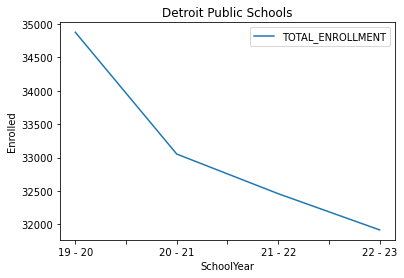

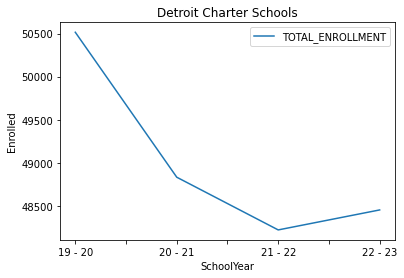

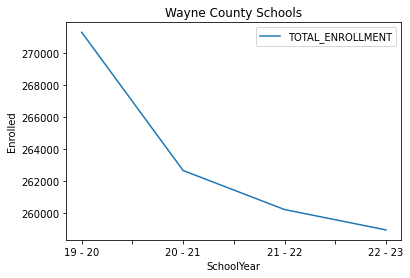

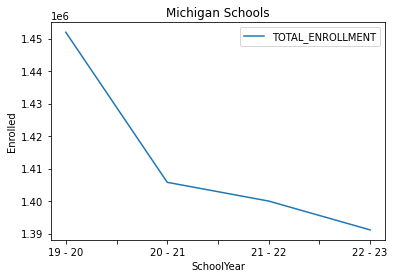

In [8]:
ax = df_group_psa.plot(legend=True)
bx = df_group_lea.plot(legend=True)
cx = df_group_wayne.plot(legend=True)
dx = df_group_michigan.plot(legend=True)

ax.set_ylabel('Enrolled')
ax.set_title('Detroit Public Schools')
bx.set_ylabel('Enrolled')
bx.set_title('Detroit Charter Schools')
cx.set_ylabel('Enrolled')
cx.set_title('Wayne County Schools')
dx.set_ylabel('Enrolled')
dx.set_title('Michigan Schools')

In [23]:
df_detroit_full = df_count[['SchoolYear', 'CountyName', 'CITY', 'TOTAL_ENROLLMENT',\
                            'EntityType','BuildingName', 'SchoolLevel']].loc[df_compare["CITY"]=="Detroit"]
#df_detroit_psa = df_detroit_full.loc[df_detroit_full['EntityType']=="PSA School"]
df_detroit_full['SchoolLevel'].unique()


array(['Elem_Middle School', 'Elem thru High School',
       'Middle_High School', 'Elementary', 'High School', 'Middle School',
       'Other'], dtype=object)